In [17]:
!pip install imbalanced-learn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.24.3
Pandas: 2.0.3
Matplotlib: 3.7.2
Seaborn: 0.12.2
Scipy: 1.11.1


In [20]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [22]:
data = data.fillna(data.mean())

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [24]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [25]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(28481, 31)
               Time            V1            V2            V3            V4  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.002292     -0.001143     -0.018290      0.000795      0.000350   
std        1.002036      1.994661      1.709050      1.522313      1.420003   
min       -1.996583    -40.470142    -63.344698    -31.813586     -5.266509   
25%       -0.861056     -0.908809     -0.610322     -0.892884     -0.847370   
50%       -0.216115      0.031139      0.051775      0.178943     -0.017692   
75%        0.938723      1.320048      0.792685      1.035197      0.737312   
max        1.641889      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      

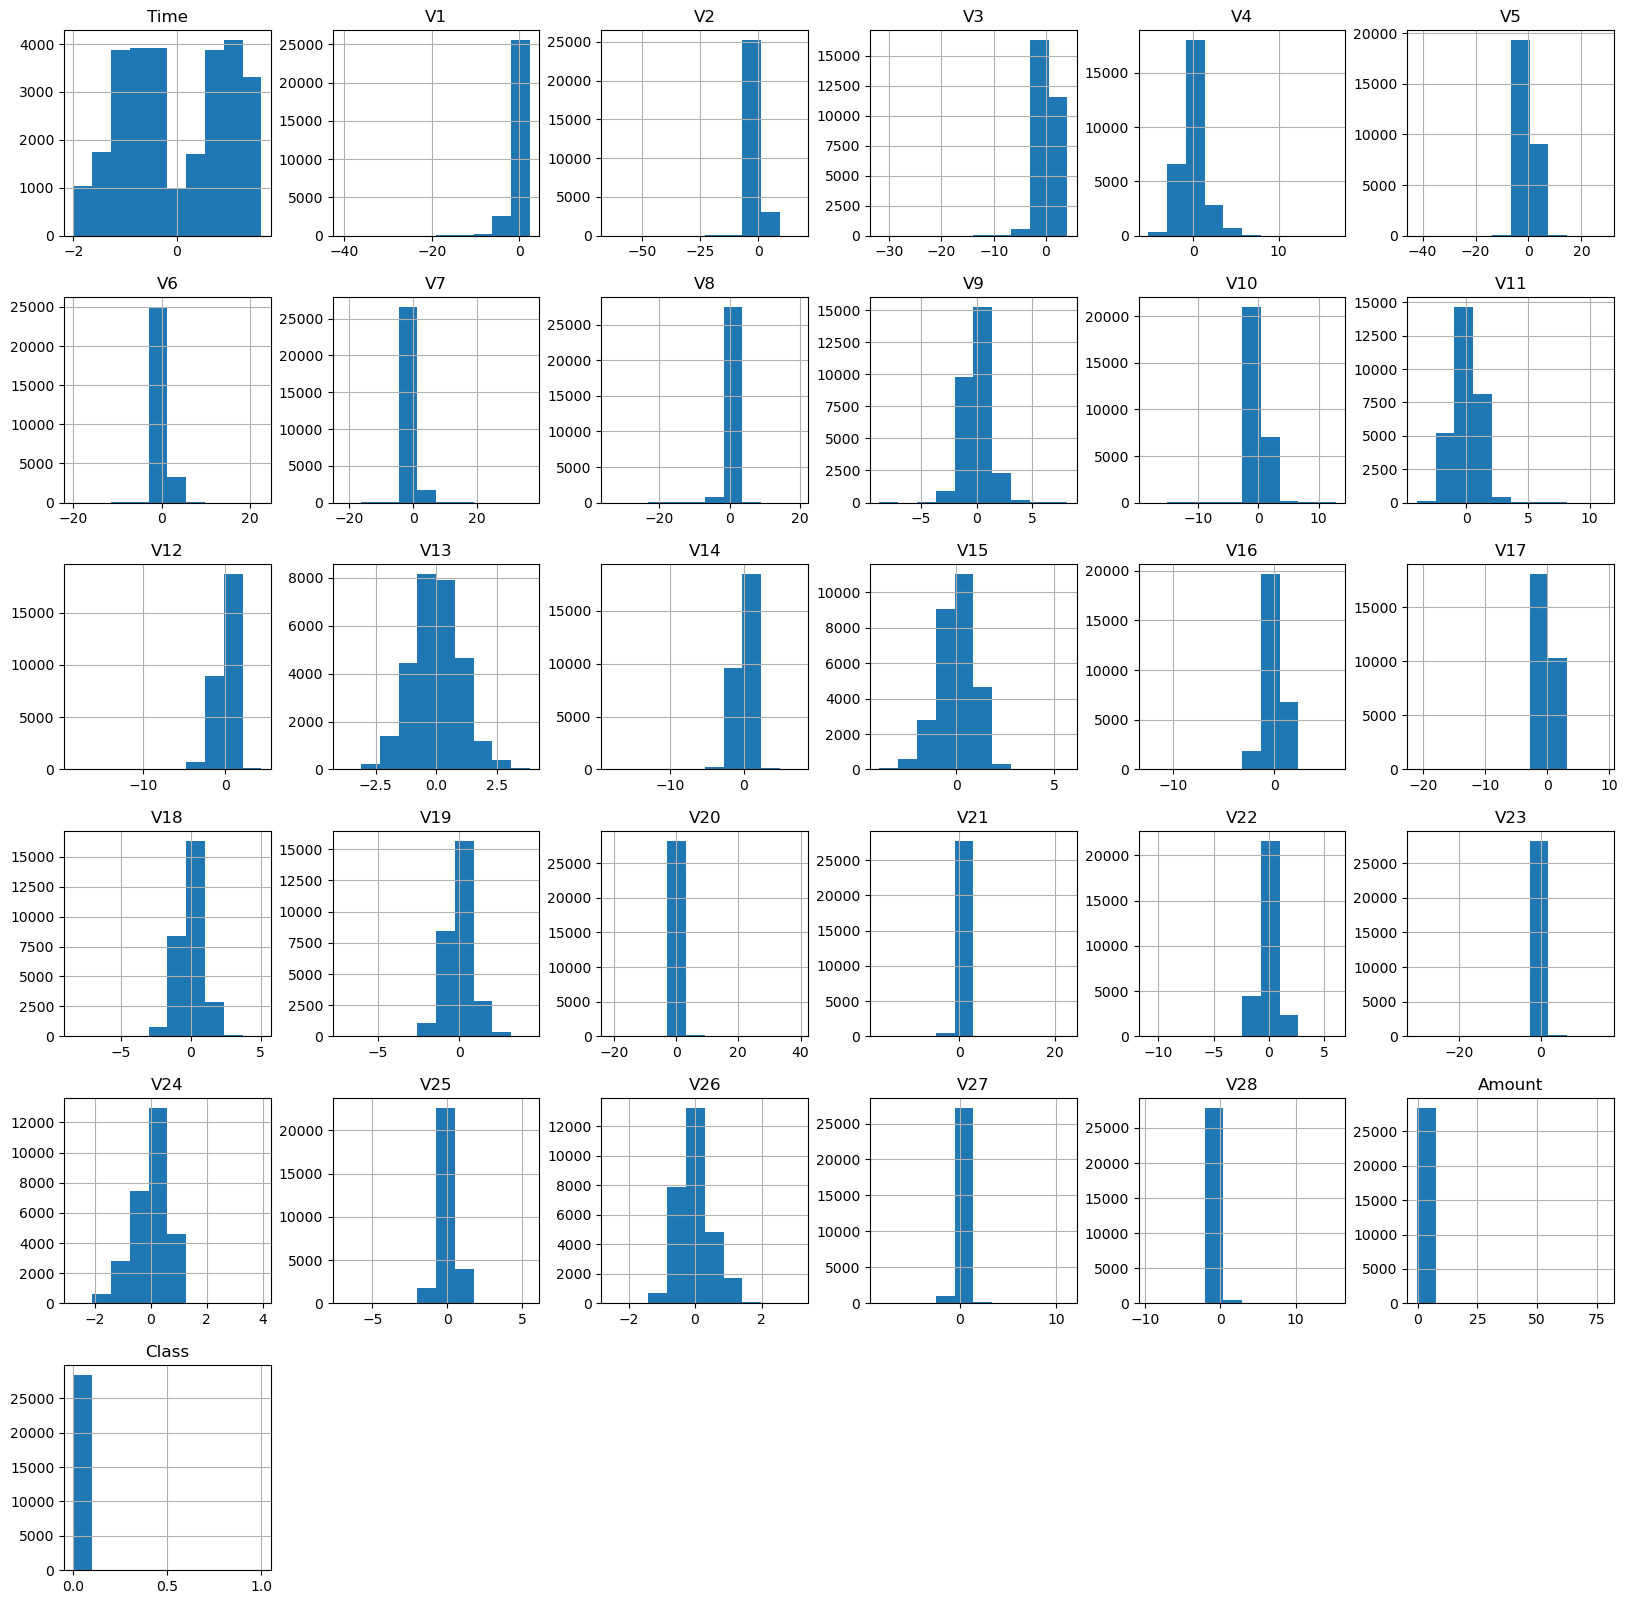

In [26]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [27]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


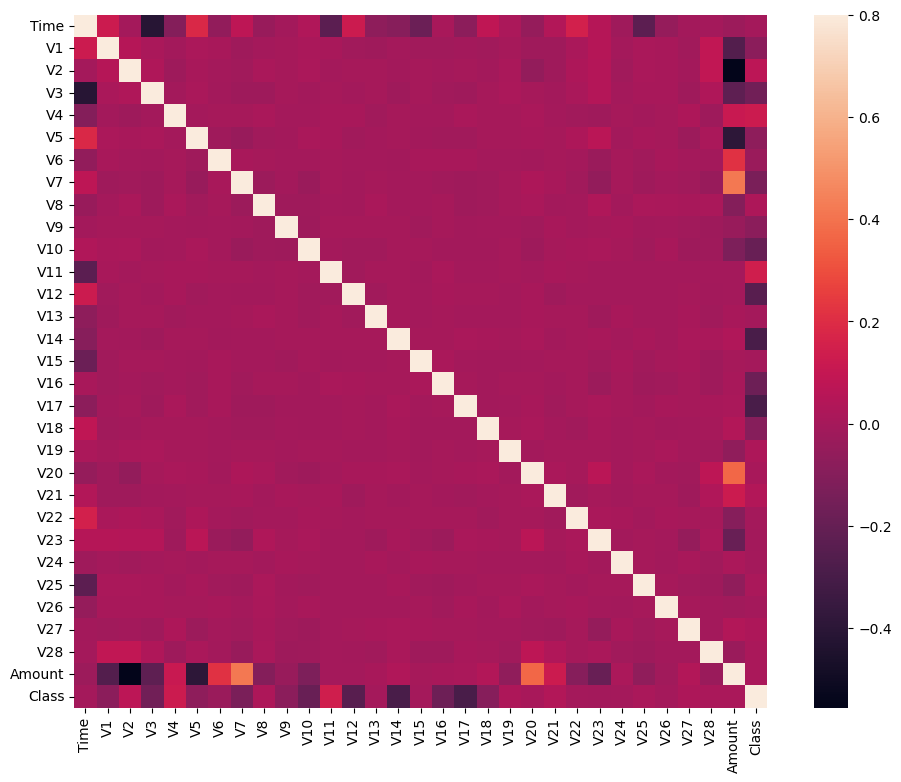

In [28]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [29]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [30]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [31]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Train and evaluate the models
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_resampled, Y_resampled, cv=5, scoring='accuracy')
    print(f'\n{model_name} - Cross-Validation Scores:')
    print(cv_scores)
    print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
    
    # fit the model on the training data
    model.fit(X_train, Y_train)
        
    y_train_pred = model.predict(X_train)
    print(f'\n{model_name} - Training Set:')
    print(f'Number of Errors: {(y_train_pred != Y_train).sum()}')
    print(f'Accuracy Score: {accuracy_score(Y_train, y_train_pred)}')
    print(classification_report(Y_train, y_train_pred))
    
    y_test_pred = model.predict(X_test)
    print(f'\n{model_name} - Test Set:')
    print(f'Number of Errors: {(y_test_pred != Y_test).sum()}')
    print(f'Accuracy Score: {accuracy_score(Y_test, y_test_pred)}')
    print(classification_report(Y_test, y_test_pred))


Logistic Regression - Cross-Validation Scores:
[0.97625956 0.97555614 0.97494065 0.97625956 0.97959902]
Mean Cross-Validation Score: 0.9765229860022003

Logistic Regression - Training Set:
Number of Errors: 1044
Accuracy Score: 0.9770504055747291
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     22766
           1       0.97      0.98      0.98     22725

    accuracy                           0.98     45491
   macro avg       0.98      0.98      0.98     45491
weighted avg       0.98      0.98      0.98     45491


Logistic Regression - Test Set:
Number of Errors: 281
Accuracy Score: 0.9752923590961048
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5666
           1       0.97      0.98      0.98      5707

    accuracy                           0.98     11373
   macro avg       0.98      0.98      0.98     11373
weighted avg       0.98      0.98      0.98     11373


Random 